In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import calendar

In [8]:
# data=pd.read_csv('kerala_monthly.csv')
data_pre=pd.read_csv('shimla_preprocessed_data.csv')
# data['Year']=data_pre['Date']
# data['Year'] = pd.to_datetime(data['Year'])
# data = data.rename(columns={'Year': 'Datestamp'})

In [9]:
data_pre

,Date,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0,1.335399,0,183556.000000
1,2010-02-01,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0,0.315025,0.572920,1.917246,1.692445,0.787077,22,0.579391,2,174609.000000
2,2010-03-01,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0,1.579549,1.957514,2.578657,2.416784,1.304062,0,2.427411,0,198760.000000
3,2010-04-01,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0,1.694506,2.995960,3.901480,4.408715,1.239439,0,3.435422,2,395110.000000
4,2010-05-01,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0,2.729116,3.342108,3.901480,4.589800,3.372002,0,3.015418,5,390553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1,-1.016627,0,102949.890137
152,2022-09-01,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1,-0.932626,0,111659.695801
153,2022-10-01,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2,-1.100627,0,115464.112793
154,2022-11-01,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1,-0.848625,0,110457.591797


In [7]:
data_pre.columns.to_list()
final_cols=['Datestamp',
 'Month',
 'Rain',
 'T_max',
 'T_min',
 'Shimla',
 'Shimla_Tourism',
 'Shimla_Weather',
 'Shimla_Travel',
 'Recreation',
 'Geographic Reference',
 'Travel',
 'Hotels & Accomodations',
 'Air Travel',
 'Bus & Rail',
 'Car & Taxi',
 'Tourist Destinations',
 'Travel Agencies', 'Tourist Arrivals' ]

In [12]:
data_pre['Car & Taxi']=data_pre['Car & Taxi'].replace('<1', 0.2 )
data_pre['Car & Taxi']=data_pre['Car & Taxi'].astype(float)
data_pre['Recreation']=data_pre['Recreation'].replace('<1', 0.3 )

data_pre['Recreation']=data_pre['Recreation'].astype(float)

In [13]:
data_pre.head()

,Date,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0.0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0.0,1.335399,0,183556.0
1,2010-02-01,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0.0,0.315025,0.572920,1.917246,1.692445,0.787077,22.0,0.579391,2,174609.0
2,2010-03-01,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0.0,1.579549,1.957514,2.578657,2.416784,1.304062,0.0,2.427411,0,198760.0
3,2010-04-01,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0.0,1.694506,2.995960,3.901480,4.408715,1.239439,0.0,3.435422,2,395110.0
4,2010-05-01,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0.0,2.729116,3.342108,3.901480,4.589800,3.372002,0.0,3.015418,5,390553.0


In [16]:
X=data_pre[[
 'Rain',
 'T_max',
 'T_min',
 'Shimla',
 'Shimla_Tourism',
 'Shimla_Weather',
 'Shimla_Travel',
 'Recreation',
 'Geographic Reference',
 'Travel',
 'Hotels & Accommodations',
 'Air Travel',
 'Bus & Rail',
 'Car & Taxi',
 'Tourist Destinations',
 'Travel Agencies']]

# remove ['Tourist Arrivals'] for just a feature matrix

In [18]:
data_pre['Datestamp'] = pd.to_datetime(data_pre['Date'])

# Extract the year and month part as a string in the format 'YYYY-MM' and convert to a list
dates = data_pre['Datestamp'].dt.strftime('%Y-%m').to_list()


print(dates)

['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07'

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

# Fit and transform the data matrix to normalize each column
last_column_name = X.columns[-1]

X[last_column_name] = X[last_column_name] / 100000

# Reshape the last_column to a 2D array (required by StandardScaler)


# Normalize the last column

# If you want to replace the original values in X with the normalized values


similarities=cosine_similarity(X)





<ipython-input-19-87f263460455>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[last_column_name] = X[last_column_name] / 100000


In [20]:
X

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies
0,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0.0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0.0,1.335399,0.00000
1,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0.0,0.315025,0.572920,1.917246,1.692445,0.787077,22.0,0.579391,0.00002
2,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0.0,1.579549,1.957514,2.578657,2.416784,1.304062,0.0,2.427411,0.00000
3,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0.0,1.694506,2.995960,3.901480,4.408715,1.239439,0.0,3.435422,0.00002
4,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0.0,2.729116,3.342108,3.901480,4.589800,3.372002,0.0,3.015418,0.00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0.0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1.0,-1.016627,0.00000
152,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0.0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1.0,-0.932626,0.00000
153,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0.0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2.0,-1.100627,0.00000
154,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0.0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1.0,-0.848625,0.00000


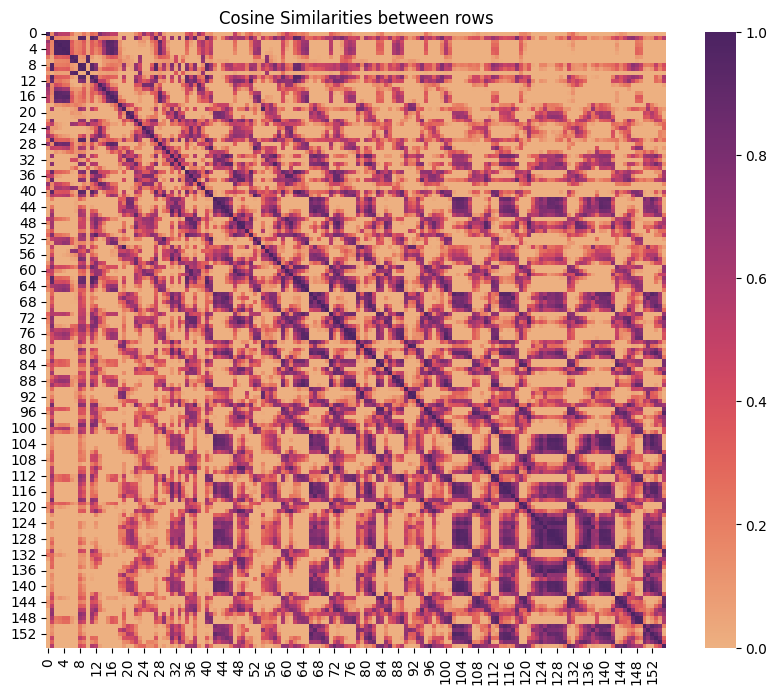

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarities, cmap='flare', vmin=0, vmax=1)
plt.title('Cosine Similarities between rows')
plt.show()

In [22]:
data_pre

,Date,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Datestamp
0,2010-01-01,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0.0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0.0,1.335399,0,183556.000000,2010-01-01
1,2010-02-01,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0.0,0.315025,0.572920,1.917246,1.692445,0.787077,22.0,0.579391,2,174609.000000,2010-02-01
2,2010-03-01,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0.0,1.579549,1.957514,2.578657,2.416784,1.304062,0.0,2.427411,0,198760.000000,2010-03-01
3,2010-04-01,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0.0,1.694506,2.995960,3.901480,4.408715,1.239439,0.0,3.435422,2,395110.000000,2010-04-01
4,2010-05-01,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0.0,2.729116,3.342108,3.901480,4.589800,3.372002,0.0,3.015418,5,390553.000000,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0.0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1.0,-1.016627,0,102949.890137,2022-08-01
152,2022-09-01,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0.0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1.0,-0.932626,0,111659.695801,2022-09-01
153,2022-10-01,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0.0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2.0,-1.100627,0,115464.112793,2022-10-01
154,2022-11-01,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0.0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1.0,-0.848625,0,110457.591797,2022-11-01


In [24]:



data_pre['Date'] = pd.to_datetime(data_pre['Date'], format='%Y-%m-%d')

# Convert the datetime objects to the desired format
data_pre['Formatted_Date'] = data_pre['Date'].dt.strftime("%b'%y")

# Extract the formatted dates as a list
dates = data_pre['Formatted_Date'].tolist()
dates





["Jan'10",
 "Feb'10",
 "Mar'10",
 "Apr'10",
 "May'10",
 "Jun'10",
 "Jul'10",
 "Aug'10",
 "Sep'10",
 "Oct'10",
 "Nov'10",
 "Dec'10",
 "Jan'11",
 "Feb'11",
 "Mar'11",
 "Apr'11",
 "May'11",
 "Jun'11",
 "Jul'11",
 "Aug'11",
 "Sep'11",
 "Oct'11",
 "Nov'11",
 "Dec'11",
 "Jan'12",
 "Feb'12",
 "Mar'12",
 "Apr'12",
 "May'12",
 "Jun'12",
 "Jul'12",
 "Aug'12",
 "Sep'12",
 "Oct'12",
 "Nov'12",
 "Dec'12",
 "Jan'13",
 "Feb'13",
 "Mar'13",
 "Apr'13",
 "May'13",
 "Jun'13",
 "Jul'13",
 "Aug'13",
 "Sep'13",
 "Oct'13",
 "Nov'13",
 "Dec'13",
 "Jan'14",
 "Feb'14",
 "Mar'14",
 "Apr'14",
 "May'14",
 "Jun'14",
 "Jul'14",
 "Aug'14",
 "Sep'14",
 "Oct'14",
 "Nov'14",
 "Dec'14",
 "Jan'15",
 "Feb'15",
 "Mar'15",
 "Apr'15",
 "May'15",
 "Jun'15",
 "Jul'15",
 "Aug'15",
 "Sep'15",
 "Oct'15",
 "Nov'15",
 "Dec'15",
 "Jan'16",
 "Feb'16",
 "Mar'16",
 "Apr'16",
 "May'16",
 "Jun'16",
 "Jul'16",
 "Aug'16",
 "Sep'16",
 "Oct'16",
 "Nov'16",
 "Dec'16",
 "Jan'17",
 "Feb'17",
 "Mar'17",
 "Apr'17",
 "May'17",
 "Jun'17",
 "Jul'17",

In [72]:
threshold = 0.99  # Adjust this threshold as needed

# Find indices where similarity is above the threshold
similar_indices = np.argwhere(similarities > threshold)

# Initialize a dictionary to store similar dates
similar_dates = {}

# Iterate through the indices and populate the dictionary
for i, j in similar_indices:
    if i != j:
        date_i = dates[i]
        date_j = dates[j]

        if date_i not in similar_dates:
            similar_dates[date_i] = [date_j]
        else:
            similar_dates[date_i].append(date_j)

# Print similar dates

for date, similar_list in similar_dates.items():
    print(f"Dates similar to {date}: {similar_list}")

similar_dates_dict = {}
for date, similar_list in similar_dates.items():
    similar_dates_dict[date] = similar_list

# Print the resulting dictionary
print(similar_dates_dict)

Dates similar to Aug'16: ["Aug'17"]
Dates similar to Aug'17: ["Aug'16"]
Dates similar to Jul'20: ["Aug'20"]
Dates similar to Aug'20: ["Jul'20"]
{"Aug'16": ["Aug'17"], "Aug'17": ["Aug'16"], "Jul'20": ["Aug'20"], "Aug'20": ["Jul'20"]}


In [28]:
similarities

array([[ 1.        ,  0.16041947,  0.6721776 , ..., -0.53696871,
        -0.39190895, -0.01319319],
       [ 0.16041947,  1.        ,  0.18561531, ...,  0.47955201,
         0.31909969,  0.56214312],
       [ 0.6721776 ,  0.18561531,  1.        , ..., -0.62283713,
        -0.76780613, -0.16167441],
       ...,
       [-0.53696871,  0.47955201, -0.62283713, ...,  1.        ,
         0.87178692,  0.30237648],
       [-0.39190895,  0.31909969, -0.76780613, ...,  0.87178692,
         1.        ,  0.43271861],
       [-0.01319319,  0.56214312, -0.16167441, ...,  0.30237648,
         0.43271861,  1.        ]])

In [78]:
threshold2 = 0.85  # Adjust this threshold as needed

# Find indices where similarity is above the threshold
similar_indices = np.argwhere(similarities > threshold2)

# Initialize a dictionary to store similar dates
# similar_dates = {}

# Iterate through the indices and populate the dictionary
for i, j in similar_indices:
    if i != j:
        date_i = dates[i]
        date_j = dates[j]

        if date_i not in similar_dates:
            similar_dates[date_i] = [date_j]
        else:
            similar_dates[date_i].append(date_j)

# Print similar dates

for date, similar_list in similar_dates.items():
    print(f"Dates similar to {date}: {similar_list}")

similar_dates_dict = {}
for date, similar_list in similar_dates.items():
    similar_dates_dict[date] = similar_list

# Print the resulting dictionary
print(similar_dates_dict)

Dates similar to Aug'16: ["Aug'17", "Aug'17", "Sep'17", "Jul'14", "Aug'17", "Sep'17"]
Dates similar to Aug'17: ["Aug'16", "Aug'16", "Sep'17", "Jul'14", "Aug'16", "Sep'17"]
Dates similar to Jul'20: ["Aug'20", "Aug'18", "Sep'18", "Oct'18", "May'20", "Aug'20", "Sep'20", "Oct'20", "May'21", "Aug'21", "Sep'21", "Oct'21", "Sep'22", "Jul'13", "Aug'13", "Sep'13", "Jul'18", "Aug'18", "Sep'18", "Oct'18", "Apr'20", "May'20", "Aug'20", "Sep'20", "Oct'20", "Apr'21", "May'21", "Aug'21", "Sep'21", "Oct'21", "Jul'22", "Sep'22"]
Dates similar to Aug'20: ["Jul'20", "Aug'18", "Sep'18", "Oct'18", "Apr'20", "May'20", "Jul'20", "Sep'20", "Oct'20", "May'21", "Aug'21", "Sep'21", "Oct'21", "Jul'13", "Aug'13", "Sep'13", "Jul'18", "Aug'18", "Sep'18", "Oct'18", "Apr'20", "May'20", "Jun'20", "Jul'20", "Sep'20", "Oct'20", "Nov'20", "Apr'21", "May'21", "Aug'21", "Sep'21", "Oct'21", "Sep'22"]
Dates similar to Feb'10: ["Sep'10", "Oct'10", "Dec'10", "Apr'12", "May'13", "Mar'15", "Sep'10", "Oct'10", "Dec'10", "Jan'11", 

In [ ]:
non_similar_indices = np.argwhere(similarities <= threshold)
non_similar_indices

array([[  0,   2],
       [  0,   3],
       [  0,   4],
       ...,
       [155, 152],
       [155, 153],
       [155, 154]])

In [29]:
len(partition)

NameError: ignored

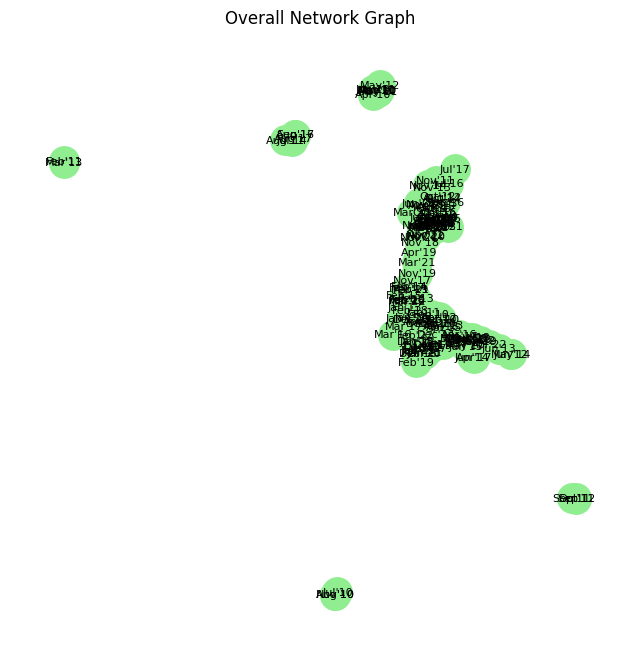

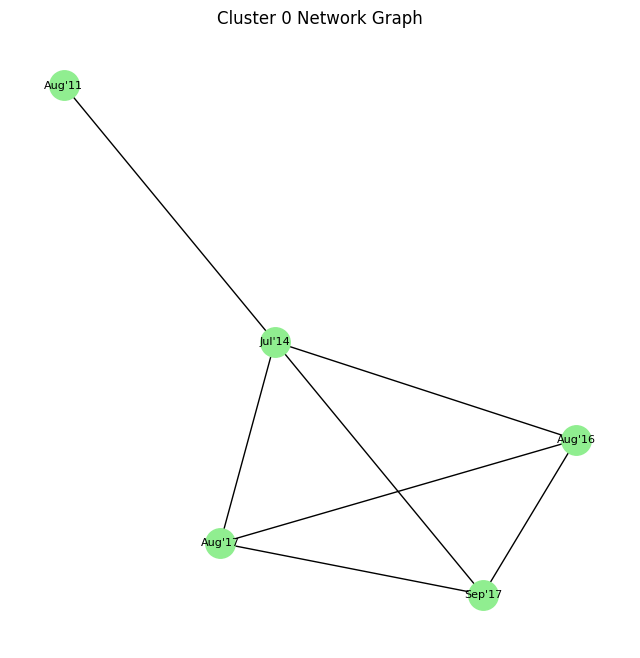

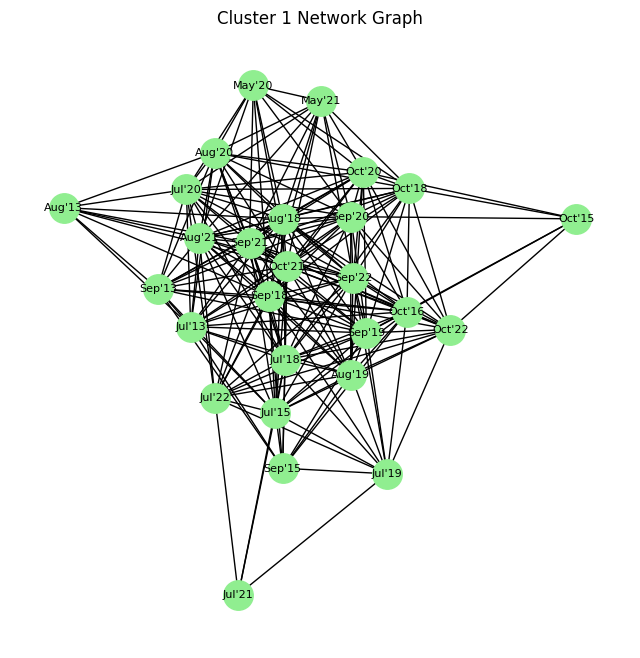

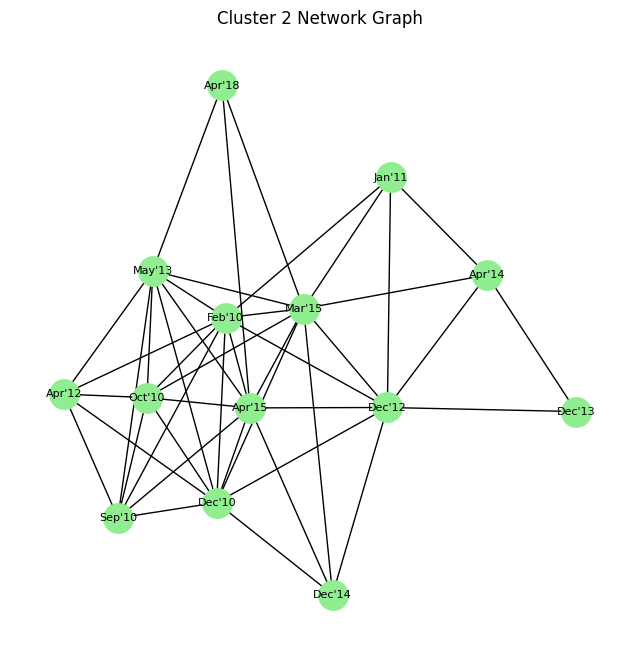

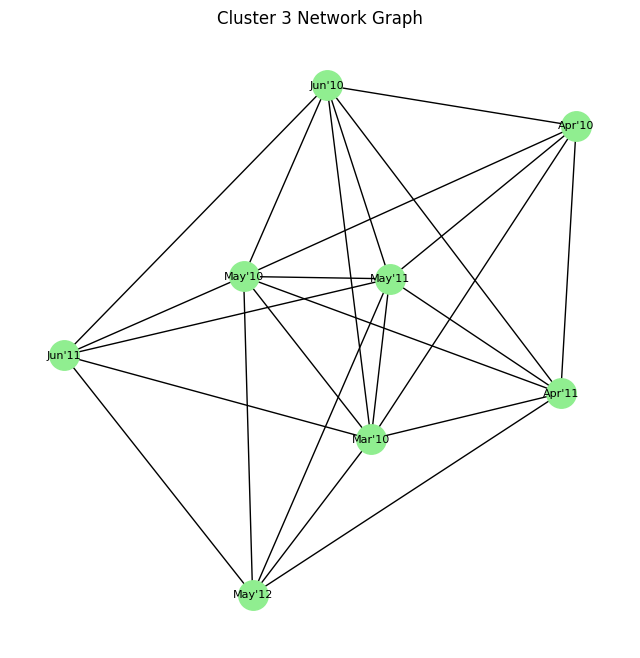

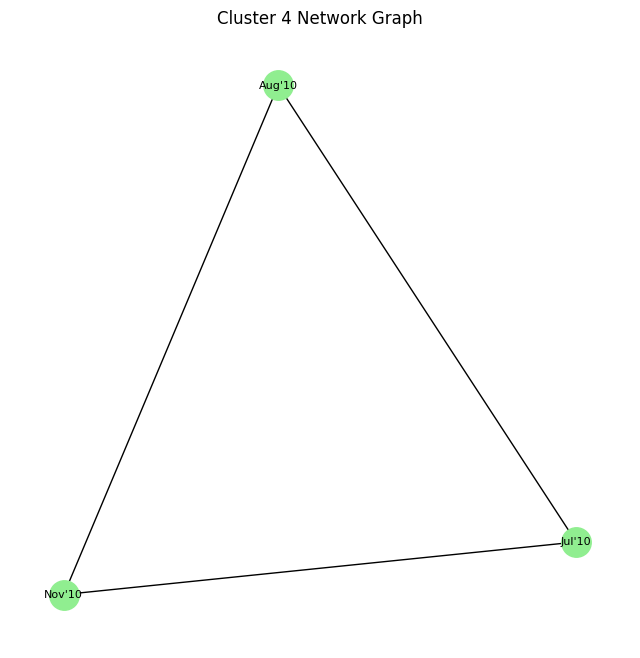

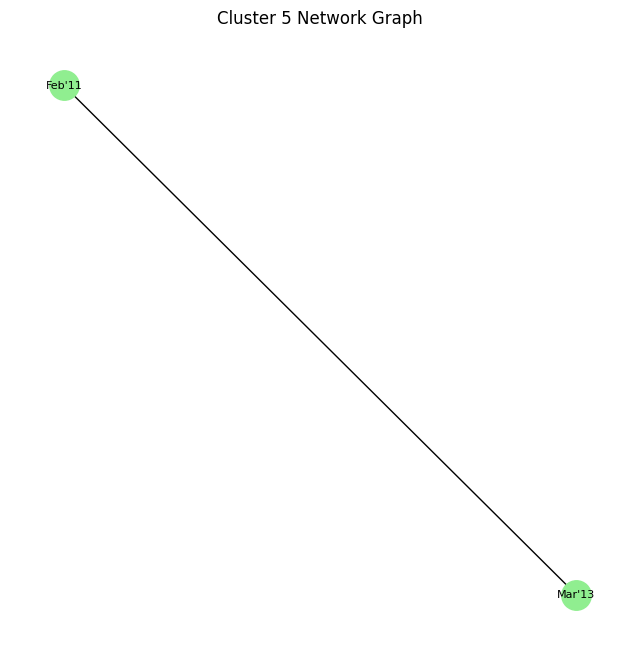

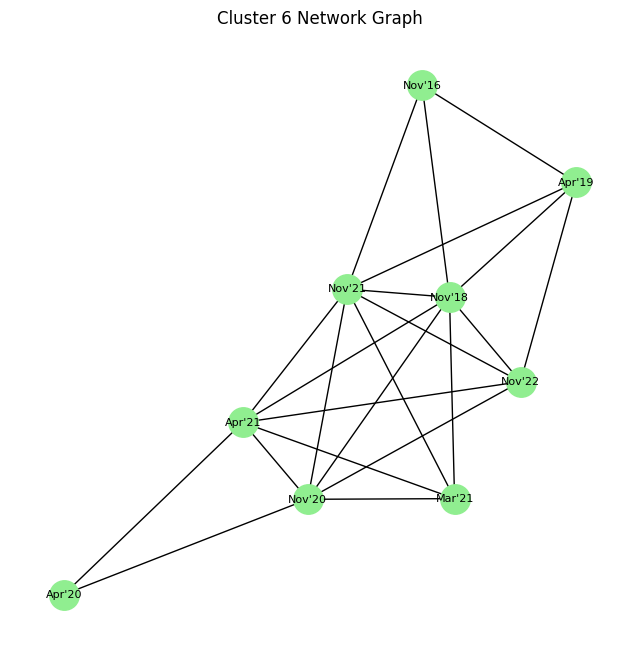

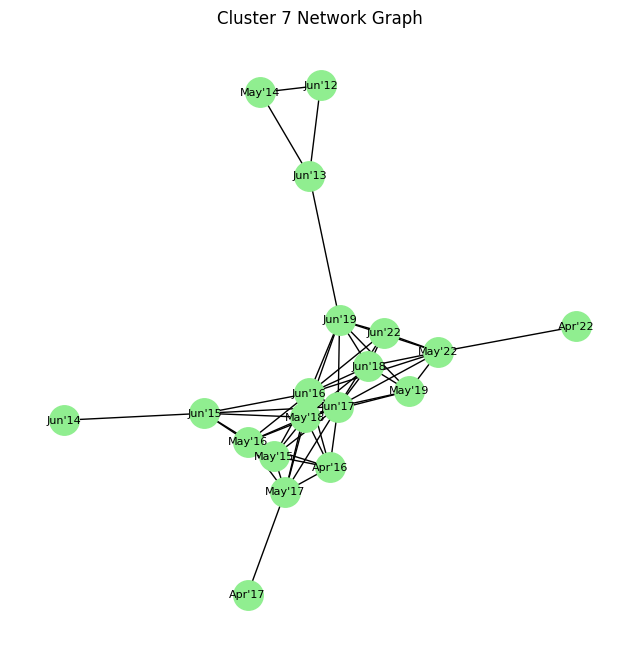

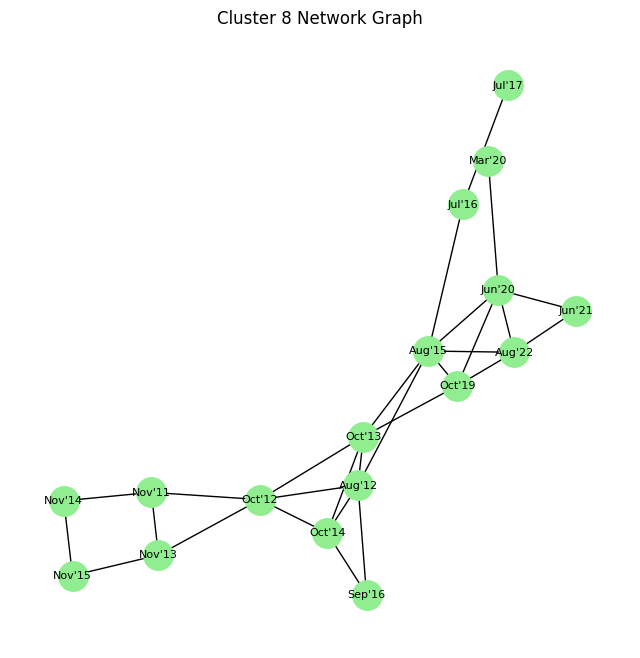

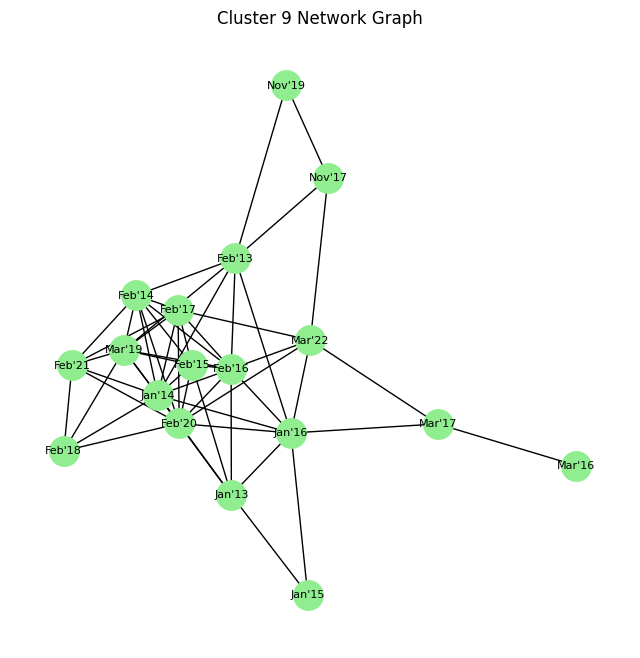

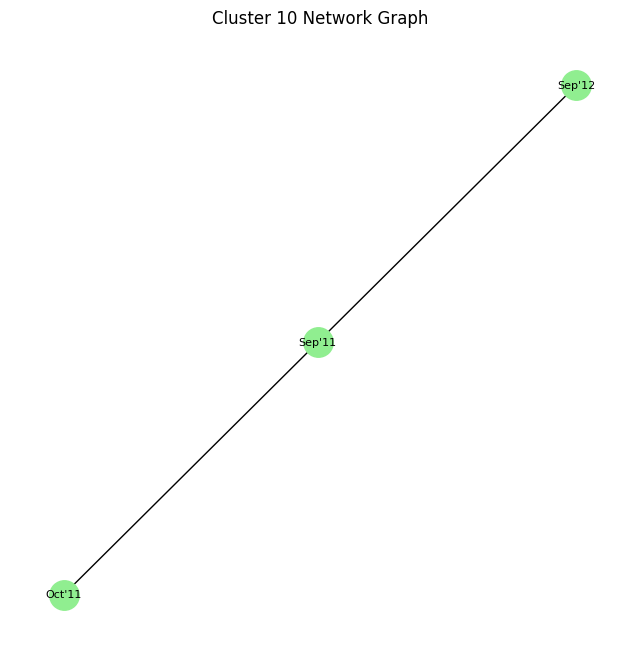

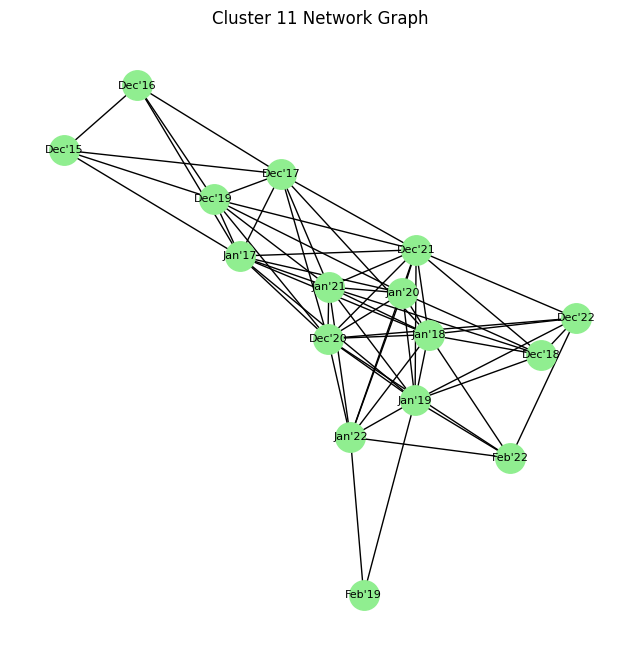

In [79]:
import networkx as nx
G = nx.Graph()
import community
from community import community_louvain

for date in similar_dates_dict:
    G.add_node(date)

# Add edges (connections between similar dates) to the graph
for date, similar_list in similar_dates_dict.items():
    for similar_date in similar_list:
        G.add_edge(date, similar_date)

# Detect clusters using the Louvain method
partition = community_louvain.best_partition(G)

# Get a list of unique cluster IDs
unique_clusters = set(partition.values())

subgraphs = {}

# Iterate over unique cluster IDs and create subgraphs
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]

    # Create a subgraph from the main graph G based on the cluster nodes
    subgraph = G.subgraph(cluster_nodes)

    # Store the subgraph in the dictionary with the cluster ID as the key
    subgraphs[cluster_id] = subgraph

# Draw and save the overall graph
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G, seed=42, k=0.01)  # Adjust node positioning
node_size = 450  # Node size
node_color = 'lightgreen'
font_size = 8  # Font size
font_color = 'black'
font_weight = 'normal'  # Font weight
edge_labels = {(date1, date2): '' for date1, date2 in G.edges()}

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

# Adjust edge label position
label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
nx.draw_networkx_edge_labels(G, label_pos, edge_labels=edge_labels)

# Add a title and turn off axis
plt.title('Overall Network Graph')
plt.axis('off')

# Save or display the overall graph
# plt.savefig('overall_graph.png')  # Save the overall graph as an image
plt.show()  # Display the overall graph

# Create subgraphs for each cluster and draw them
for cluster_id, subgraph in subgraphs.items():
    plt.figure(figsize=(8, 8))  # Set the figure size
    pos = nx.spring_layout(subgraph, seed=42, k=0.15)  # Adjust node positioning
    node_size = 450  # Node size
    node_color = 'lightgreen'
    font_size = 8  # Font size
    font_color = 'black'
    font_weight = 'normal'  # Font weight
    edge_labels = {(date1, date2): '' for date1, date2 in subgraph.edges()}

    # Draw nodes and edges
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color)
    nx.draw_networkx_edges(subgraph, pos)
    nx.draw_networkx_labels(subgraph, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

    # Adjust edge label position
    label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
    nx.draw_networkx_edge_labels(subgraph, label_pos, edge_labels=edge_labels)

    # Add a title and turn off axis
    plt.title(f'Cluster {cluster_id} Network Graph')
    plt.axis('off')

    # Save or display the subgraph
    # plt.savefig(f'cluster_{cluster_id}_graph.png')  # Save the subgraph as an image
    plt.show()  # Display the subgraph



In [80]:
len(partition)

141

In [34]:
clusters = []
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]
    print(cluster_nodes)
    for nodes in cluster_nodes:
      for index, value in data_pre["Formatted_Date"].iteritems():
        if nodes == value:
          data_pre["Cluster_ID"][index] = cluster_id


["Jul'20", "Aug'20"]
["Aug'16", "Aug'17"]


<ipython-input-34-1054fde95e73>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre["Formatted_Date"].iteritems():
<ipython-input-34-1054fde95e73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre["Cluster_ID"][index] = cluster_id


In [41]:
similarities

array([[ 1.        ,  0.16041947,  0.6721776 , ..., -0.53696871,
        -0.39190895, -0.01319319],
       [ 0.16041947,  1.        ,  0.18561531, ...,  0.47955201,
         0.31909969,  0.56214312],
       [ 0.6721776 ,  0.18561531,  1.        , ..., -0.62283713,
        -0.76780613, -0.16167441],
       ...,
       [-0.53696871,  0.47955201, -0.62283713, ...,  1.        ,
         0.87178692,  0.30237648],
       [-0.39190895,  0.31909969, -0.76780613, ...,  0.87178692,
         1.        ,  0.43271861],
       [-0.01319319,  0.56214312, -0.16167441, ...,  0.30237648,
         0.43271861,  1.        ]])

In [32]:
data_pre['Formatted_Date'] = data_pre['Date'].dt.strftime("%b'%y")

In [33]:
data_pre = data_pre.assign(Cluster_ID=None)

In [35]:
data_pre

,Date,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,...,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Datestamp,Formatted_Date,Cluster_ID
0,2010-01-01,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0.0,0.027634,...,0.065293,-0.842740,-0.117647,0.0,1.335399,0,183556.000000,2010-01-01,Jan'10,None
1,2010-02-01,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0.0,0.315025,...,1.917246,1.692445,0.787077,22.0,0.579391,2,174609.000000,2010-02-01,Feb'10,None
2,2010-03-01,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0.0,1.579549,...,2.578657,2.416784,1.304062,0.0,2.427411,0,198760.000000,2010-03-01,Mar'10,None
3,2010-04-01,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0.0,1.694506,...,3.901480,4.408715,1.239439,0.0,3.435422,2,395110.000000,2010-04-01,Apr'10,None
4,2010-05-01,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0.0,2.729116,...,3.901480,4.589800,3.372002,0.0,3.015418,5,390553.000000,2010-05-01,May'10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0.0,-0.489671,...,-0.992965,-0.842740,-0.893125,1.0,-1.016627,0,102949.890137,2022-08-01,Aug'22,None
152,2022-09-01,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0.0,-0.489671,...,-0.992965,-0.299486,-0.893125,1.0,-0.932626,0,111659.695801,2022-09-01,Sep'22,None
153,2022-10-01,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0.0,0.027634,...,-0.992965,-0.299486,-0.570009,2.0,-1.100627,0,115464.112793,2022-10-01,Oct'22,None
154,2022-11-01,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0.0,0.085112,...,-0.728401,-0.661656,-0.505386,1.0,-0.848625,0,110457.591797,2022-11-01,Nov'22,None


In [36]:
print("\nNone values in each column:")
print(data_pre.isna().any())


None values in each column:
Date                       False
Rain                       False
T_max                      False
T_min                      False
Shimla                     False
Shimla_Tourism             False
Shimla_Weather             False
Shimla_Travel              False
Recreation                 False
Geographic Reference       False
Travel                     False
Hotels & Accommodations    False
Air Travel                 False
Bus & Rail                 False
Car & Taxi                 False
Tourist Destinations       False
Travel Agencies            False
Tourist Arrivals           False
Datestamp                  False
Formatted_Date             False
Cluster_ID                  True
dtype: bool


In [37]:
for cluster_id in unique_clusters:
  nodes_not_in_clusters = [node for node, cluster in partition.items() if cluster is None]

# 'nodes_not_in_clusters' now contains a list of nodes not included in any cluster
print("Nodes not in any cluster:", nodes_not_in_clusters)

Nodes not in any cluster: []


In [38]:
dates = data_pre["Formatted_Date"].to_numpy()

In [39]:
for value in dates:
  if value not in partition:
    print(value)
    nodes_not_in_clusters.append(value)

Jan'10
Feb'10
Mar'10
Apr'10
May'10
Jun'10
Jul'10
Aug'10
Sep'10
Oct'10
Nov'10
Dec'10
Jan'11
Feb'11
Mar'11
Apr'11
May'11
Jun'11
Jul'11
Aug'11
Sep'11
Oct'11
Nov'11
Dec'11
Jan'12
Feb'12
Mar'12
Apr'12
May'12
Jun'12
Jul'12
Aug'12
Sep'12
Oct'12
Nov'12
Dec'12
Jan'13
Feb'13
Mar'13
Apr'13
May'13
Jun'13
Jul'13
Aug'13
Sep'13
Oct'13
Nov'13
Dec'13
Jan'14
Feb'14
Mar'14
Apr'14
May'14
Jun'14
Jul'14
Aug'14
Sep'14
Oct'14
Nov'14
Dec'14
Jan'15
Feb'15
Mar'15
Apr'15
May'15
Jun'15
Jul'15
Aug'15
Sep'15
Oct'15
Nov'15
Dec'15
Jan'16
Feb'16
Mar'16
Apr'16
May'16
Jun'16
Jul'16
Sep'16
Oct'16
Nov'16
Dec'16
Jan'17
Feb'17
Mar'17
Apr'17
May'17
Jun'17
Jul'17
Sep'17
Oct'17
Nov'17
Dec'17
Jan'18
Feb'18
Mar'18
Apr'18
May'18
Jun'18
Jul'18
Aug'18
Sep'18
Oct'18
Nov'18
Dec'18
Jan'19
Feb'19
Mar'19
Apr'19
May'19
Jun'19
Jul'19
Aug'19
Sep'19
Oct'19
Nov'19
Dec'19
Jan'20
Feb'20
Mar'20
Apr'20
May'20
Jun'20
Sep'20
Oct'20
Nov'20
Dec'20
Jan'21
Feb'21
Mar'21
Apr'21
May'21
Jun'21
Jul'21
Aug'21
Sep'21
Oct'21
Nov'21
Dec'21
Jan'22
Feb'22
Mar'22

In [40]:
nodes_not_in_clusters

["Jan'10",
 "Feb'10",
 "Mar'10",
 "Apr'10",
 "May'10",
 "Jun'10",
 "Jul'10",
 "Aug'10",
 "Sep'10",
 "Oct'10",
 "Nov'10",
 "Dec'10",
 "Jan'11",
 "Feb'11",
 "Mar'11",
 "Apr'11",
 "May'11",
 "Jun'11",
 "Jul'11",
 "Aug'11",
 "Sep'11",
 "Oct'11",
 "Nov'11",
 "Dec'11",
 "Jan'12",
 "Feb'12",
 "Mar'12",
 "Apr'12",
 "May'12",
 "Jun'12",
 "Jul'12",
 "Aug'12",
 "Sep'12",
 "Oct'12",
 "Nov'12",
 "Dec'12",
 "Jan'13",
 "Feb'13",
 "Mar'13",
 "Apr'13",
 "May'13",
 "Jun'13",
 "Jul'13",
 "Aug'13",
 "Sep'13",
 "Oct'13",
 "Nov'13",
 "Dec'13",
 "Jan'14",
 "Feb'14",
 "Mar'14",
 "Apr'14",
 "May'14",
 "Jun'14",
 "Jul'14",
 "Aug'14",
 "Sep'14",
 "Oct'14",
 "Nov'14",
 "Dec'14",
 "Jan'15",
 "Feb'15",
 "Mar'15",
 "Apr'15",
 "May'15",
 "Jun'15",
 "Jul'15",
 "Aug'15",
 "Sep'15",
 "Oct'15",
 "Nov'15",
 "Dec'15",
 "Jan'16",
 "Feb'16",
 "Mar'16",
 "Apr'16",
 "May'16",
 "Jun'16",
 "Jul'16",
 "Sep'16",
 "Oct'16",
 "Nov'16",
 "Dec'16",
 "Jan'17",
 "Feb'17",
 "Mar'17",
 "Apr'17",
 "May'17",
 "Jun'17",
 "Jul'17",
 "Sep'17",

In [ ]:
sorted = []

In [ ]:
for node in nodes_not_in_clusters:
  for index, value in data_pre['Formatted_Date'].iteritems():

      if node == value:
        sorted.append(np.argsort(similarities[index]))


<ipython-input-175-d6012d8ea009>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [ ]:
sorted

[array([127, 126, 138, 128, 115, 150, 151, 125,  41, 136, 102, 141, 139,
        137, 140,  54, 103, 101,  55,  42, 116,  65, 152, 148, 114, 142,
         53,   6, 129,  91, 117, 105, 149,  78, 100, 123, 153,  17,  89,
          5,  77,  92,  29,  43,  31,  57,  19,  90, 113,  56, 124,  30,
         86,  18,   9, 154,   7,  66,  76,  79, 111,  20, 147, 104,  44,
         63,  10, 130, 135,  45,  68,  67,  88, 106,  64,  69,  22,  93,
        143, 155,  33,  32,  70,  52,  39, 122,   8,  21, 132, 131, 118,
         27,  81, 134,  62,  74,  80,  87, 144, 112,  98, 121,  38, 107,
         99, 146, 110, 133, 145, 109, 108,  94,   4, 119,  75,   3,  13,
        120,  97,  28,  15,  85,  71,  34,  40,  73,  50,  95,  83,  49,
         51,  96,  48,  84,  82,  72,  61,  60,  37,  16,   2,  46,  25,
         36,  23,  26,  35,  24,  14,  59,  47,   0,  12,   1,  58,  11]),
 array([127, 138, 126, 115, 150, 128, 151, 125,  41, 102, 136, 141, 139,
        103,  54, 137, 140, 101,  55,  42, 116,  

In [ ]:
clustering_node = [58,
24,
47,
47,
97,
109,
109,
155,
144,
135,
145,
146,
121,
133,
98,
118]

In [ ]:
required_node = []

In [ ]:
for node in clustering_node:
  for index, value in data_pre['Formatted_Date'].iteritems():

    if node == index:
      required_node.append(value)


<ipython-input-208-cd32db6a8ed1>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [ ]:
required_node

["Nov'14",
 "Jan'12",
 "Dec'13",
 "Dec'13",
 "Feb'18",
 "Feb'19",
 "Feb'19",
 "Dec'22",
 "Jan'22",
 "Apr'21",
 "Feb'22",
 "Mar'22",
 "Feb'20",
 "Feb'21",
 "Mar'18",
 "Nov'19"]

In [ ]:
nnew ={}

In [ ]:
for item in partition:
  for i in range (0,16):
    nnew[nodes_not_in_clusters[i]] = partition[required_node[i]]

In [ ]:
nnew

{"Dec'10": 8,
 "Mar'11": 6,
 "Feb'13": 8,
 "Nov'16": 8,
 "Dec'17": 0,
 "Feb'19": 7,
 "Mar'19": 7,
 "Nov'19": "Dec'22",
 "Feb'20": "Jan'22",
 "Mar'20": 5,
 "Feb'21": "Feb'22",
 "Mar'21": "Mar'22",
 "Jan'22": "Nov'19",
 "Feb'22": "Feb'21",
 "Mar'22": 7,
 "Dec'22": "Mar'19"}

In [ ]:
nnew["Dec'22"]=7
nnew["Nov'19"]=7
nnew["Jan'22"]=7
nnew["Feb'20"]=7
nnew["Mar'21"]=7

In [ ]:
nnew

{"Dec'10": 8,
 "Mar'11": 6,
 "Feb'13": 8,
 "Nov'16": 8,
 "Dec'17": 0,
 "Feb'19": 7,
 "Mar'19": 7,
 "Nov'19": 7,
 "Feb'20": 7,
 "Mar'20": 5,
 "Feb'21": "Feb'22",
 "Mar'21": 7,
 "Jan'22": 7,
 "Feb'22": "Feb'21",
 "Mar'22": 7,
 "Dec'22": 7}

In [ ]:
nodesnotinclusters2 = ["Feb'21",
 "Feb'22"]

In [ ]:
clustering2 = [58,
24,
47,
47,
97,
110,
109,
155,
144,
135,
145,
146,
121,
133,
98,
118]

In [ ]:
for node in nodesnotinclusters2:
  for index, value in data_pre['Formatted_Date'].iteritems():

      if node == value:
        sorted.append(np.argsort(similarities[index]))

<ipython-input-220-546445702e95>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [ ]:
sorted = []

In [ ]:
sorted

[array([127, 138, 115, 150, 126, 128, 151,  41, 102, 125,  54, 141,  55,
        139, 136, 101, 103,  42, 137, 140,  65, 116,   6, 152, 148,  91,
         53,  17, 114,   5,  78, 100, 117, 142, 149, 153, 105,  89,  29,
         77,  92,  31, 129,  43,  19,  57,  56, 123,   9,  90,   7,  18,
         30, 113,  20,  10,  66,  86,  76,  79, 154,  44,  63,  45, 124,
        111, 147,  68,  22,  67,  69,  64,   8, 104,  33,  88,  93,  32,
         21, 130,  70, 106,  52,  39, 155, 135, 143,  27,  81, 118,  62,
         80, 122, 132,  74,   4,   3, 131,  87,   0,  38,   1,  13,   2,
         12,  15,  11,  98,  35,  34,  71,  99,  36,  16,  28,  23,  60,
        112,  24, 107, 121,  14, 144, 134,  59,  25,  46,  94,  40,  26,
         96,  48,  58,  83,  61, 146,  75,  47,  84,  37, 119,  95,  72,
         49, 108, 120,  85,  73,  51,  82, 110,  97,  50, 109, 145, 133]),
 array([127, 138, 115, 150, 126, 128, 151,  41, 102, 125,  54, 141,  55,
        136, 139, 101, 103,  42, 140, 137,  65, 1

In [ ]:
clustering2 = [109,120]

In [ ]:
for node in clustering2:
  for index, value in data_pre['Formatted_Date'].iteritems():

    if node == index:
      required2.append(value)


<ipython-input-225-2a63cd36022f>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [ ]:
required2 = []

In [ ]:
required2

["Feb'19", "Jan'20"]

In [ ]:
nnew2 = {}

In [ ]:
for item in partition:
  for i in range (0,2):
    nnew2[nodesnotinclusters2[i]] = partition[required2[i]]

In [ ]:
nnew2

{"Feb'21": 7, "Feb'22": 6}

In [ ]:
partition.update(nnew)
partition.update(nnew2)

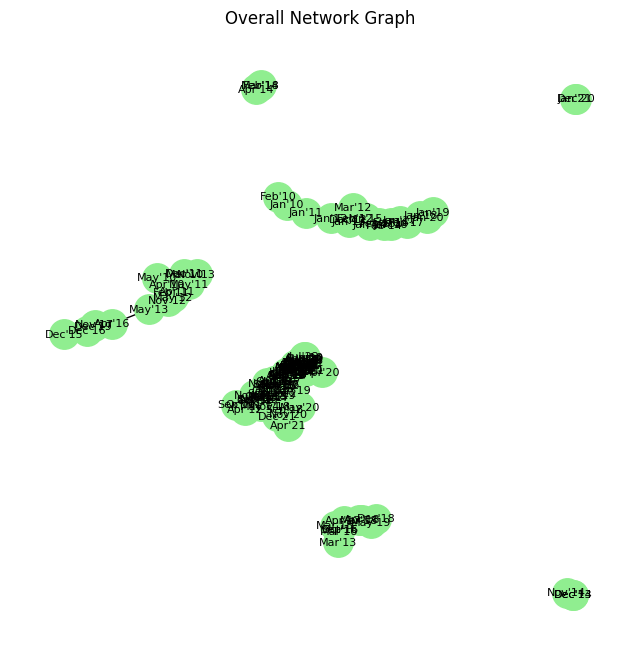

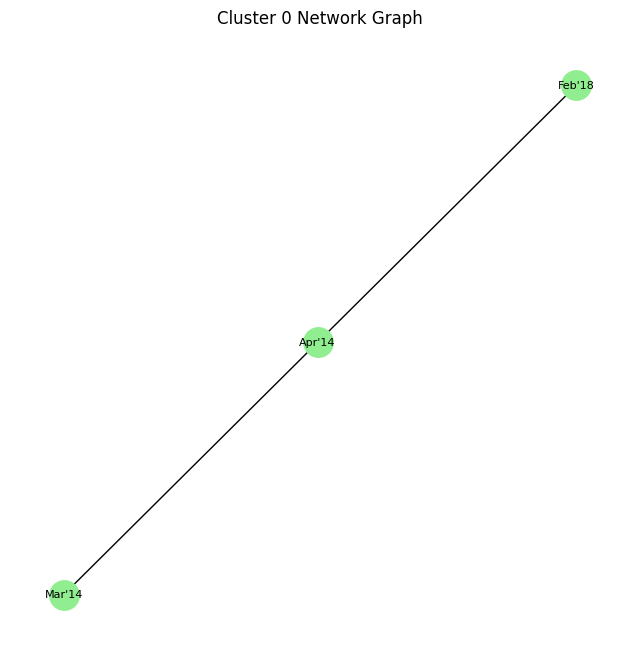

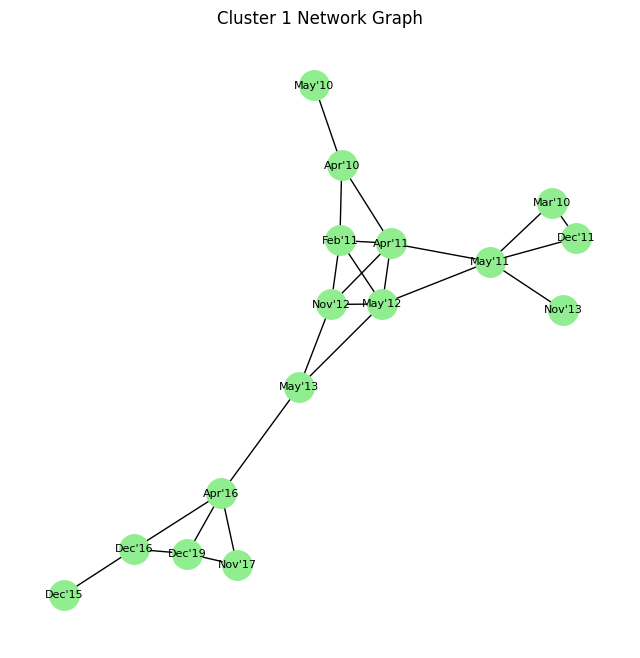

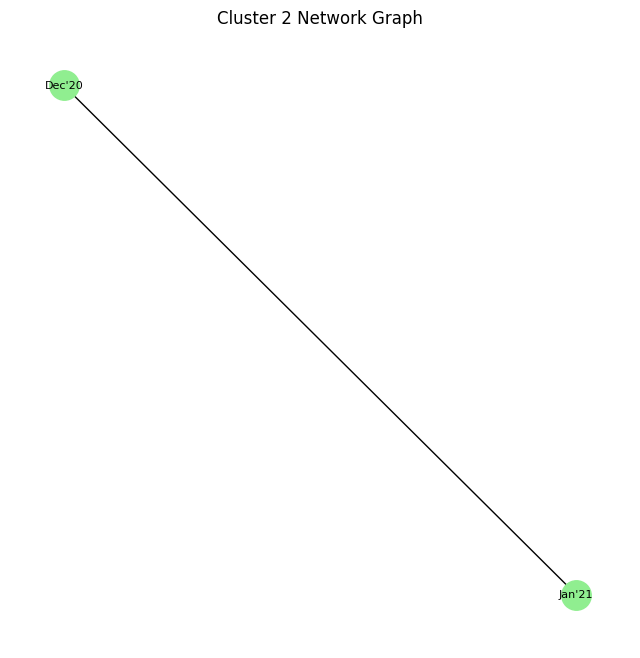

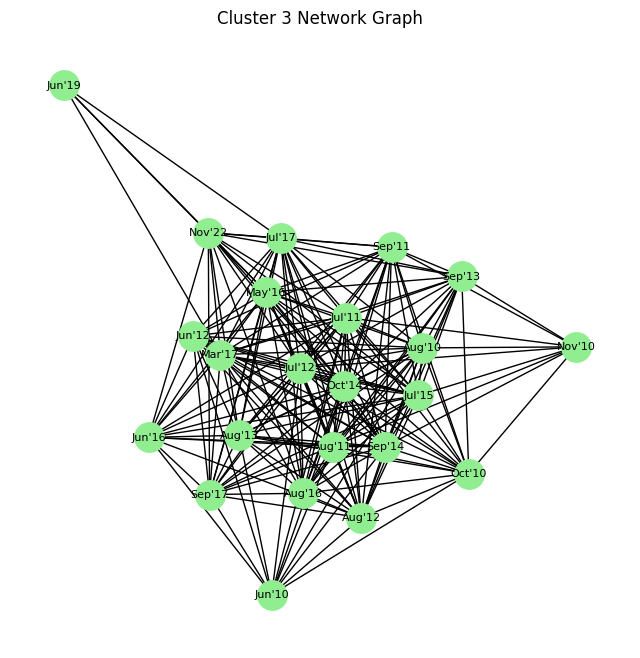

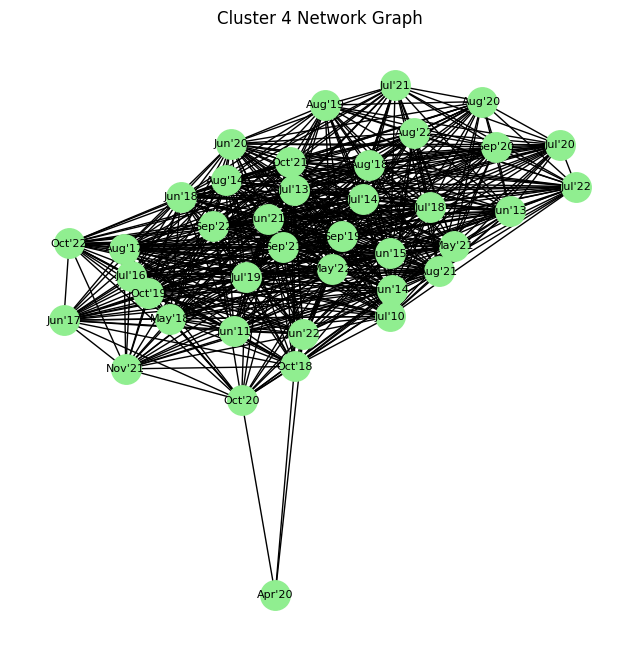

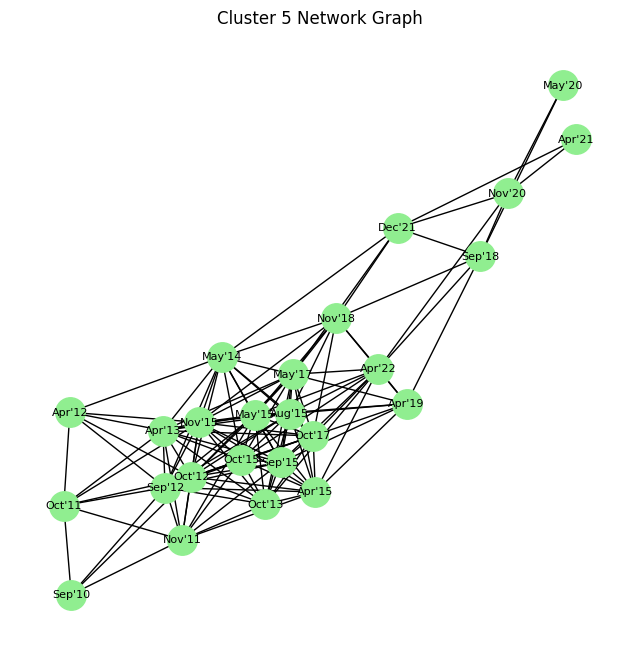

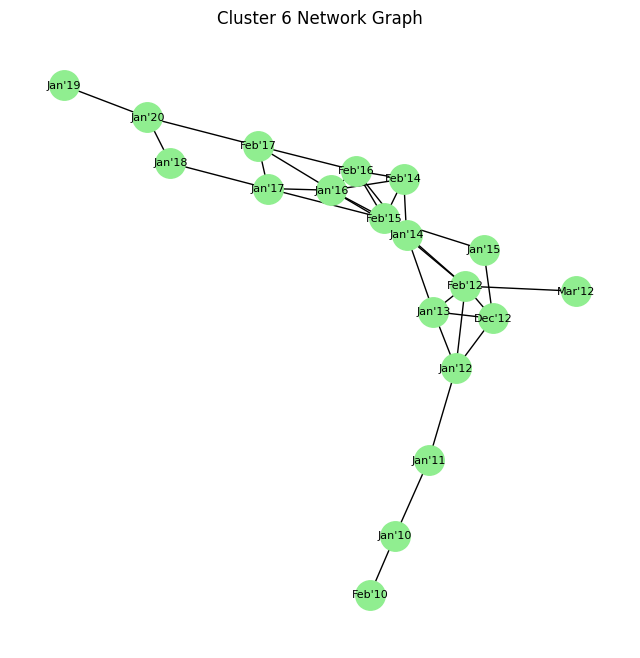

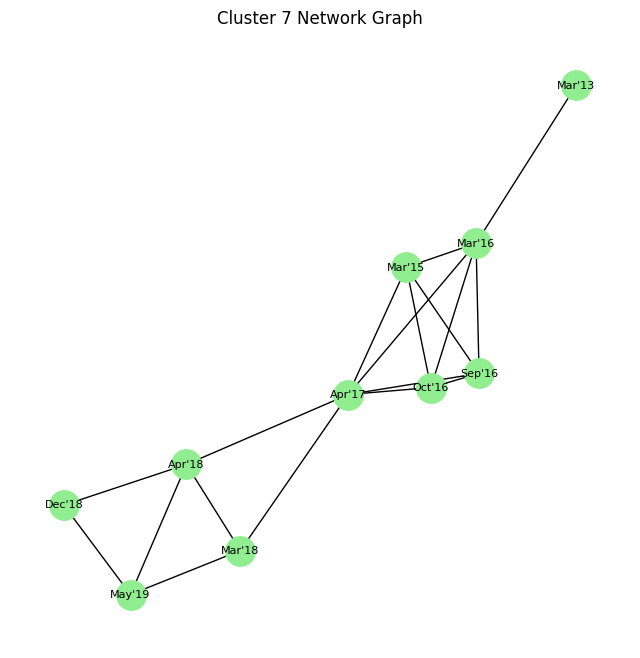

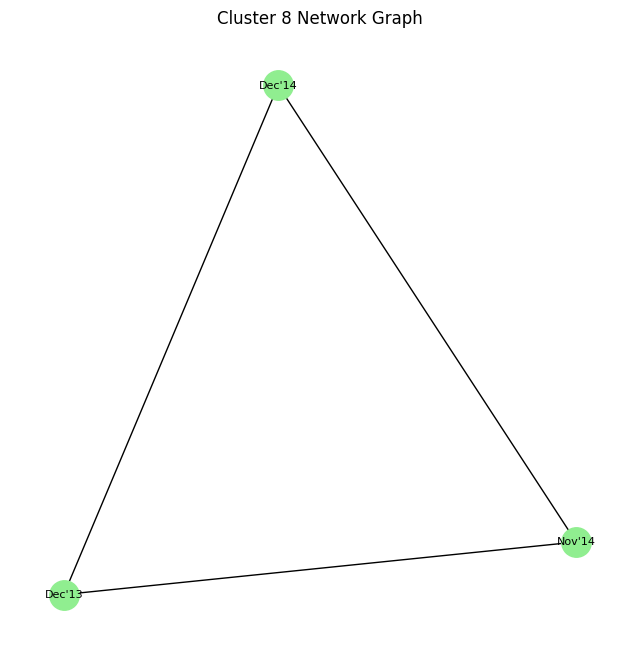

In [ ]:
unique_clusters = set(partition.values())

subgraphs = {}

# Iterate over unique cluster IDs and create subgraphs
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]

    # Create a subgraph from the main graph G based on the cluster nodes
    subgraph = G.subgraph(cluster_nodes)

    # Store the subgraph in the dictionary with the cluster ID as the key
    subgraphs[cluster_id] = subgraph

# Draw and save the overall graph
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G, seed=42, k=0.01)  # Adjust node positioning
node_size = 450  # Node size
node_color = 'lightgreen'
font_size = 8  # Font size
font_color = 'black'
font_weight = 'normal'  # Font weight
edge_labels = {(date1, date2): '' for date1, date2 in G.edges()}

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

# Adjust edge label position
label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
nx.draw_networkx_edge_labels(G, label_pos, edge_labels=edge_labels)

# Add a title and turn off axis
plt.title('Overall Network Graph')
plt.axis('off')

# Save or display the overall graph
# plt.savefig('overall_graph.png')  # Save the overall graph as an image
plt.show()  # Display the overall graph

# Create subgraphs for each cluster and draw them
for cluster_id, subgraph in subgraphs.items():
    plt.figure(figsize=(8, 8))  # Set the figure size
    pos = nx.spring_layout(subgraph, seed=42, k=0.15)  # Adjust node positioning
    node_size = 450  # Node size
    node_color = 'lightgreen'
    font_size = 8  # Font size
    font_color = 'black'
    font_weight = 'normal'  # Font weight
    edge_labels = {(date1, date2): '' for date1, date2 in subgraph.edges()}

    # Draw nodes and edges
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color)
    nx.draw_networkx_edges(subgraph, pos)
    nx.draw_networkx_labels(subgraph, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

    # Adjust edge label position
    label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
    nx.draw_networkx_edge_labels(subgraph, label_pos, edge_labels=edge_labels)

    # Add a title and turn off axis
    plt.title(f'Cluster {cluster_id} Network Graph')
    plt.axis('off')

    # Save or display the subgraph
    # plt.savefig(f'cluster_{cluster_id}_graph.png')  # Save the subgraph as an image
    plt.show()  # Display the subgraph

In [ ]:
alpha = data_pre["Cluster_ID"].to_numpy

In [ ]:
print(alpha)

<bound method IndexOpsMixin.to_numpy of 0      6
1      6
2      1
3      1
4      1
      ..
151    4
152    4
153    4
154    3
155    7
Name: Cluster_ID, Length: 156, dtype: object>


In [ ]:
data_pre.to_csv("datapre.csv")